---
$ title: "Análisis Numérico de las Series de Taylor y Aplicaciones del Método de Newton-Raphson"
author:
  - name: "Sebastian Fernandez T.  -  202439800"
    affiliation: "Ciencias Naturales y Exactas, Universidad del Valle"
    email: " "
date: "Agosto 29, 2024"$
---

# Aproximación de la funcion exponencial con órdenes superiores a 3

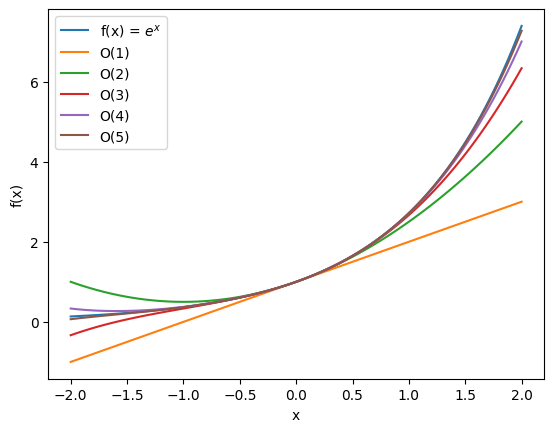

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def graph(formula, x_range):
    x = np.array(x_range)
    y = formula(x)
    set_title = False
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend(['f(x) = $e^{x}$', 'O(1)', 'O(2)', 'O(3)', 'O(4)', 'O(5)'])

    
# Gráfica de la serie de taylor de la función exponencial para términos de 1 a 5
graph(np.exp, np.linspace(-2, 2, 100))
graph(lambda x: 1 + x, np.linspace(-2, 2, 100))
graph(lambda x: 1 + x + x**2/2, np.linspace(-2, 2, 100))
graph(lambda x: 1 + x + x**2/2 + x**3/6, np.linspace(-2, 2, 100))
graph(lambda x: 1 + x + x**2/2 + x**3/6 + x**4/24, np.linspace(-2, 2, 100))
graph(lambda x: 1 + x + x**2/2 + x**3/6 + x**4/24 + x**5/120, np.linspace(-2, 2, 100))




# Nosotros intentaremos aproximar la función $f(x) = 1/x$ 

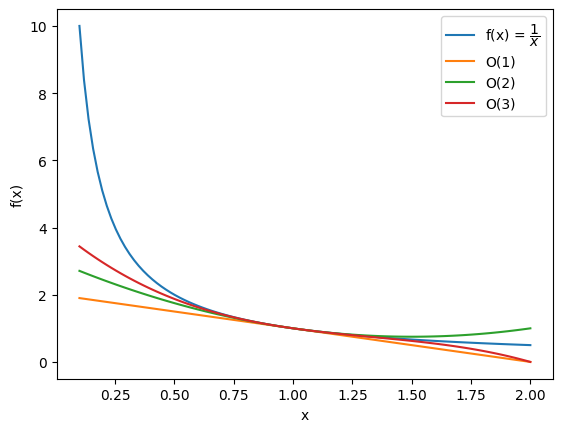

In [8]:
# veamos ahora la serie de taylor para la funcion ln(x) en torno a x=1

def graph_2(formula, x_range):
    x = np.array(x_range)
    y = formula(x)
    set_title = False
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend(['f(x) = $\\dfrac{1}{x}$', 'O(1)', 'O(2)', 'O(3)'], loc='upper right')
    
# la serie de taylor de 1/x en torno a x=1 es 1 -(x-1) + (x-1)^2 - (x-1)^3 + (x-1)^4
graph_2(lambda x: 1/x, np.linspace(0.1, 2, 100))
graph_2(lambda x: 1 - (x-1), np.linspace(0.1, 2, 100))
graph_2(lambda x: 1 - (x-1) + (x-1)**2, np.linspace(0.1, 2, 100))
graph_2(lambda x: 1 - (x-1) + (x-1)**2 - (x-1)**3, np.linspace(0.1, 2, 100))






# Aproximar $\sqrt{612}$ con el método de Newton

In [9]:
import numpy as np

# Definimos la función y su derivada
def f(x):
    return x**2 - 612

def df(x):
    return 2*x

# Método de Newton
def newton_method(initial_guess, tolerance=1e-7, max_iterations=100):
    x_n = initial_guess
    for n in range(max_iterations):
        f_xn = f(x_n)
        df_xn = df(x_n)
        
        # Evitar división por cero
        if df_xn == 0:
            print("Derivada cero. No se puede continuar.")
            return None
        
        # Actualización de la aproximación
        x_n1 = x_n - f_xn / df_xn
        
        # Comprobamos si la aproximación es suficientemente buena
        if abs(x_n1 - x_n) < tolerance:
            return x_n1
        
        x_n = x_n1
    
    print("No se alcanzó la convergencia.")
    return None

# Valor inicial
initial_guess = 20  # Aproximación inicial

# Llamamos al método de Newton
approximation = newton_method(initial_guess)

# Mostramos el resultado
print(f"La aproximación de la raíz cuadrada de 612 es: {approximation}")

La aproximación de la raíz cuadrada de 612 es: 24.73863375370596


# Encontrar los $x_0$ tales que $f(x_0)=0$  para la función $f(x) = cos(x) - x^{3}$

In [11]:
import numpy as np

def newton_raphson(f, df, x0, tol=1e-6, max_iter=20):
    """
    Método de Newton-Raphson para encontrar las raíces de la función f(x).
    
    Parameters:
    - f: Función lambda en una variable x, f(x).
    - df: Derivada de la función lambda f(x).
    - x0: Valor inicial para comenzar la iteración.
    - tol: Tolerancia para la convergencia (criterio de parada).
    - max_iter: Número máximo de iteraciones.
    
    Returns:
    - x: Raíz aproximada de la función.
    - iteraciones: Número de iteraciones realizadas.
    """
    
    x = x0
    for i in range(max_iter):
        fx = f(x)
        dfx = df(x)
        
        if abs(fx) < tol:
            print(f"Convergencia alcanzada en {i+1} iteraciones.")
            return x, i+1
        
        if dfx == 0:
            raise ValueError("La derivada se anuló. El método no puede continuar.\n")
        
        x = x - fx / dfx
    
    raise ValueError("No se alcanzó la convergencia después del número máximo de iteraciones.\n")

# Ejemplo de uso

# Define la función f(x) como una función lambda
f = lambda x: np.cos(x) - x**3

# Derivada de la función f(x)
df = lambda x: -np.sin(x) - 3*x**2

# Valor inicial para la iteración
x0 = [-1.5, 0, 0.5, 1, 2, 3, 4]

# Llamamos al método de Newton-Raphson
for x in x0:
    try:
        root, iterations = newton_raphson(f, df, x)
        print(f"Raíz encontrada en x={root} con {iterations} iteraciones comenzando en x0={x}.\n")
    except ValueError as e:
        print(e)
        
        


No se alcanzó la convergencia después del número máximo de iteraciones.

La derivada se anuló. El método no puede continuar.

Convergencia alcanzada en 6 iteraciones.
Raíz encontrada en x=0.8654740331109566 con 6 iteraciones comenzando en x0=0.5.

Convergencia alcanzada en 4 iteraciones.
Raíz encontrada en x=0.865474075952977 con 4 iteraciones comenzando en x0=1.

Convergencia alcanzada en 6 iteraciones.
Raíz encontrada en x=0.8654740789787362 con 6 iteraciones comenzando en x0=2.

Convergencia alcanzada en 7 iteraciones.
Raíz encontrada en x=0.8654740623303405 con 7 iteraciones comenzando en x0=3.

Convergencia alcanzada en 8 iteraciones.
Raíz encontrada en x=0.865474033553886 con 8 iteraciones comenzando en x0=4.

